# EDA

## Questions


1. Why is it important to convert RNA into cDNA for RNA-Seq? What would happen if we tried to sequence RNA directly?

---> RNA is too delicate and the process of sequencing it is risky! because of "OH" function group in carbon 3' of it's backbone sugar which makes the reactions occur more easily. To sequence it the reverse transcription process will be applied and we obtain a more stable molecule that is less susceptible to degradation during the sequencing process. One more reason is cDNA synthesis allows the removal of ribosomal RNA (rRNA) from the sample, as rRNA can dominate the sequencing reads and overshadow the detection of other RNA species of interest. By removing rRNA, we can focus on the study of mRNA or other specific RNA molecules.
So if we use RNA sequence directly we face the loss of information and inaccurate representation of the transcriptome and with presence of rRNA, detecting desired type of RNA would be difficult.

2. How does the process of preparing a sequencing library contribute to the accuracy of RNA-Seq results? What are some potential sources of error in this step?

---> fragmentation, adapter ligation, and amplification, which contribute to the accurate representation of the transcriptome. By fragmenting the RNA molecules, we create smaller fragments that are more efficiently sequenced. Adapter ligation allows for the attachment of sequencing adapters, which provide the necessary sequences for the sequencing platform to identify and sequence the fragments. Amplification helps overcome the limitations of low-input RNA samples, ensuring that sufficient material is available for sequencing.
For example, during fragmentation, there may be biases in the representation of certain RNA molecules, leading to inaccurate quantification. Adapter ligation can result in incomplete or incorrect ligation events, affecting the efficiency of sequencing. Additionally, amplification can introduce biases during the PCR process, leading to uneven representation of transcripts. These errors can affect the accuracy and reliability of RNA-Seq results and should be carefully considered and minimized during the library preparation step.

3. How does the ability of RNA-Seq to detect novel transcripts contribute to our understanding of gene function? Can you think of a scenario where this capability would be particularly useful?

---> Traditional gene annotation relies on existing knowledge and reference databases, which may not capture all the transcripts present in a particular sample or condition. RNA-Seq allows for the discovery of previously unknown or unannotated transcripts, providing insights into alternative splicing, gene fusion events, non-coding RNAs, and other transcriptomic features.
For example, in cancer research, RNA-Seq can identify novel fusion genes or isoforms that may be specific to certain cancer types or subtypes. These novel transcripts can serve as potential biomarkers or therapeutic targets. Similarly, in developmental biology, RNA-Seq can detect previously unknown isoforms or non-coding RNAs that play critical roles in embryogenesis or tissue differentiation. By uncovering these novel transcripts, RNA-Seq expands our understanding of gene regulation and function.

4. Why might a researcher choose to use RNA-Seq instead of microarrays for a gene expression study? What are some potential advantages and disadvantages of each method?

--->
Advantages of RNA-Seq:

Increased dynamic range: RNA-Seq has a broader dynamic range compared to microarrays, allowing for more accurate quantification of highly expressed and lowly expressed genes.
Detection of novel transcripts: RNA-Seq can identify novel transcripts, including novel isoforms, splice variants, and non-coding RNAs, providing a more comprehensive view of the transcriptome.
Higher resolution: RNA-Seq provides nucleotide-level resolution, allowing for precise mapping of reads and identification of specific sequence variations, such as single nucleotide polymorphisms (SNPs) or RNA editing events.
No dependence on prior knowledge: RNA-Seq does not rely on pre-existing gene annotations or probe designs, making it suitable for studying non-model organisms or scenarios where comprehensive gene annotations are lacking.
Ability to quantify gene expression and alternative splicing simultaneously: RNA-Seq can measure gene expression levels and detect alternative splicing events in a single experiment, providing more comprehensive information on gene regulation.
Disadvantages of RNA-Seq:

Higher cost: RNA-Seq generally has a higher cost per sample compared to microarrays, especially for large-scale studies.
More computational analysis: RNA-Seq generates a larger amount of raw data, requiring more extensive computational analysis for read alignment, transcript assembly, and differential gene expression analysis.
Longer experimental workflow: RNA-Seq involves additional steps such as library preparation and sequencing, which can lengthen the experimental timeline compared to microarrays.
Overall, the advantages of RNA-Seq, including increased dynamicrange, detection of novel transcripts, higher resolution, and simultaneous quantification of gene expression and alternative splicing, make it a preferred choice for many gene expression studies. However, researchers should consider factors such as cost, computational requirements, and experimental timeline when deciding between RNA-Seq and microarrays.


## preprocessing and normalization

In [2]:
import pandas as pd

# Load the gene expression data
expression_data = pd.read_csv('./dataset/GSE203528_readcount.xls', sep='\t')

# Transpose the dataframe so that columns become rows and vice versa
transposed_df = expression_data.set_index('geneID').T.reset_index()
transposed_df.rename(columns={'index': 'tissue_id'}, inplace=True)

# Load the sample mapping data
sample_mapping = pd.read_csv('./dataset/sample_mappings.csv')
sample_mapping =sample_mapping.rename(columns={'social_settting':'social_setting'}) # correct the alphabetic mistake
# Merge the transposed gene expression data with the sample mapping
merged_df = pd.merge(transposed_df, sample_mapping, on='tissue_id')

# Reorder columns to place metadata columns at the front
metadata_columns = ['sample_id', 'social_setting', 'study_group', 'tissue_id']
gene_columns = [col for col in merged_df.columns if col not in metadata_columns]
transformed_df = merged_df[metadata_columns + gene_columns]

# Save the transformed and merged dataset
transformed_df.to_csv('./dataset/transformed_dataset.csv', index=False)

# Display the first few rows of the transformed dataset
display(transformed_df.head())

,sample_id,social_setting,study_group,tissue_id,ENSTGUG00000008284,ENSTGUG00000003938,ENSTGUG00000011987,ENSTGUG00000017592,ENSTGUG00000009442,ENSTGUG00000009764,...,ENSTGUG00000010786,ENSTGUG00000004644,ENSTGUG00000006386,ENSTGUG00000017785,ENSTGUG00000001573,ENSTGUG00000014656,ENSTGUG00000003563,ENSTGUG00000002845,ENSTGUG00000009990,ENSTGUG00000001666
0,GSM6175777,NF,L,HY3,145,25,915,5,226,94,...,443,493,722,0,0,0,1473,43,276,181
1,GSM6175779,ISO,S,HY5,149,21,938,5,221,76,...,327,433,523,0,0,0,1522,37,145,118
2,GSM6175780,ISO,L,HY6,121,29,638,14,257,126,...,350,370,395,0,2,1,1320,22,174,110
3,GSM6175781,ISO,L,HY8,159,22,900,5,202,178,...,418,435,389,0,26,5,1542,57,219,116
4,GSM6175782,ISO,L,HY9,172,38,749,4,197,94,...,274,342,291,0,0,5,1267,24,157,88


### normalization

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('./dataset/transformed_dataset.csv')

# Function to calculate CPM
def calculate_cpm(df):
    total_reads = df.sum(axis=0)
    cpm = (df / total_reads) * 1e6
    return cpm

# Apply CPM normalization (excluding metadata columns)
metadata_cols = ['sample_id', 'social_setting', 'study_group', 'tissue_id']
expression_data = df.drop(columns=metadata_cols)
normalized_df = calculate_cpm(expression_data)

# Combine the normalized data with the metadata
normalized_df = pd.concat([df[metadata_cols], normalized_df], axis=1)

# Save the normalized dataset
normalized_df.to_csv('./dataset/normalized_dataset.csv', index=False)

# Display the first few rows of the normalized dataset
display(normalized_df.head())
print(normalized_df.shape)

,sample_id,social_setting,study_group,tissue_id,ENSTGUG00000008284,ENSTGUG00000003938,ENSTGUG00000011987,ENSTGUG00000017592,ENSTGUG00000009442,ENSTGUG00000009764,...,ENSTGUG00000010786,ENSTGUG00000004644,ENSTGUG00000006386,ENSTGUG00000017785,ENSTGUG00000001573,ENSTGUG00000014656,ENSTGUG00000003563,ENSTGUG00000002845,ENSTGUG00000009990,ENSTGUG00000001666
0,GSM6175777,NF,L,HY3,7916.143473,5231.219920,8352.808004,5319.148936,6991.276372,7795.007878,...,9225.899161,8094.573516,10803.531348,0.0,0.000000,0.000000,4415.388212,5699.138502,9239.730843,13426.303687
1,GSM6175779,ISO,S,HY5,8134.519845,4394.224733,8562.769298,5319.148936,6836.602116,6302.346795,...,6810.088094,7109.432723,7825.826725,0.0,0.000000,0.000000,4562.268065,4903.909874,4854.206421,8753.059862
2,GSM6175780,ISO,L,HY6,6605.885243,6068.215108,5824.143723,14893.617021,7950.256759,10448.627581,...,7289.085116,6075.034890,5910.519228,0.0,10695.187166,3636.363636,3956.763368,2915.838304,5825.047705,8159.632075
3,GSM6175781,ISO,L,HY8,8680.460774,4603.473530,8215.876725,5319.148936,6248.839943,14760.759599,...,8705.250224,7142.270750,5820.739189,0.0,139037.433155,18181.818182,4622.219025,7554.671968,7331.525560,8604.702915
4,GSM6175782,ISO,L,HY9,9390.183982,7951.454279,6837.435186,4255.319149,6094.165687,7795.007878,...,5706.312348,5615.302520,4354.331887,0.0,0.000000,18181.818182,3797.893323,3180.914513,5255.933849,6527.705660


(131, 18622)


## feature selection and plot 

In [1]:
import pandas as pd

In [9]:
df = pd.read_csv('./dataset/normalized_dataset.csv')
df = df.dropna(axis='columns')
df.loc[:, df.isna().any()]

""
0
1
2
3
4
...
126
127
128
129


In [10]:
metadata_cols_names = ['sample_id', 'social_setting', 'study_group', 'tissue_id']
expression_data = df.drop(columns=metadata_cols_names[1:]).set_index('sample_id')
expression_data

,ENSTGUG00000008284,ENSTGUG00000003938,ENSTGUG00000011987,ENSTGUG00000017592,ENSTGUG00000009442,ENSTGUG00000009764,ENSTGUG00000015152,ENSTGUG00000002407,ENSTGUG00000016201,ENSTGUG00000004296,...,ENSTGUG00000010786,ENSTGUG00000004644,ENSTGUG00000006386,ENSTGUG00000017785,ENSTGUG00000001573,ENSTGUG00000014656,ENSTGUG00000003563,ENSTGUG00000002845,ENSTGUG00000009990,ENSTGUG00000001666
sample_id,,,,,,,,,,,,,,,,,,,,,
GSM6175777,7916.143473,5231.219920,8352.808004,5319.148936,6991.276372,7795.007878,8513.816281,7962.714871,0.0,7333.976074,...,9225.899161,8094.573516,10803.531348,0.0,0.000000,0.000000,4415.388212,5699.138502,9239.730843,13426.303687
GSM6175779,8134.519845,4394.224733,8562.769298,5319.148936,6836.602116,6302.346795,7617.625093,7679.679982,0.0,5862.206689,...,6810.088094,7109.432723,7825.826725,0.0,0.000000,0.000000,4562.268065,4903.909874,4854.206421,8753.059862
GSM6175780,6605.885243,6068.215108,5824.143723,14893.617021,7950.256759,10448.627581,2389.843167,6660.754382,0.0,8065.471793,...,7289.085116,6075.034890,5910.519228,0.0,10695.187166,3636.363636,3956.763368,2915.838304,5825.047705,8159.632075
GSM6175781,8680.460774,4603.473530,8215.876725,5319.148936,6248.839943,14760.759599,4929.051531,5622.959790,0.0,5396.975412,...,8705.250224,7142.270750,5820.739189,0.0,139037.433155,18181.818182,4622.219025,7554.671968,7331.525560,8604.702915
GSM6175782,9390.183982,7951.454279,6837.435186,4255.319149,6094.165687,7795.007878,1941.747573,5056.890013,40000.0,6088.970361,...,5706.312348,5615.302520,4354.331887,0.0,0.000000,18181.818182,3797.893323,3180.914513,5255.933849,6527.705660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM6175906,8625.866681,10880.937435,11182.721098,3191.489362,6681.927860,9287.668961,10007.468260,13793.233579,0.0,6222.102582,...,7684.778308,9063.295296,7302.109831,0.0,10695.187166,0.000000,8297.212880,4903.909874,11214.890697,6230.991766
GSM6175907,5732.379757,9206.947060,8727.086833,11702.127660,11291.220689,8707.189651,12696.041822,8509.915656,0.0,9905.915021,...,9767.374055,9440.932600,9396.977405,0.0,16042.780749,0.000000,11471.616218,4241.219351,10746.208697,5785.920926
GSM6175908,7806.955287,11090.186231,10644.124735,5319.148936,12807.028398,7214.528568,14339.058999,15887.691756,0.0,10796.876806,...,10225.545119,9128.971349,6075.115966,0.0,0.000000,10909.090909,12340.905140,9807.819748,7264.570989,7492.025814


In [11]:
metadata_cols = df[metadata_cols_names].set_index('sample_id')
metadata_cols

,social_setting,study_group,tissue_id
sample_id,,,
GSM6175777,NF,L,HY3
GSM6175779,ISO,S,HY5
GSM6175780,ISO,L,HY6
GSM6175781,ISO,L,HY8
GSM6175782,ISO,L,HY9
...,...,...,...
GSM6175906,KFC,L,TN67
GSM6175907,KFC,S,TN68
GSM6175908,KFC,L,TN69


### **Questions**

**Dataset Breakdown**

**Questions**

1. Why do you think the read counts vary between different genes in the same sample? What biological factors might contribute to this variation?

--->
- Differential gene expression: Genes have different expression levels, meaning some genes are naturally more active or abundant in a particular sample compared to others. Highly expressed genes tend to have higher read counts due to the presence of more RNA transcripts.
- Gene length and structure: Genes can vary in length and complexity. Longer genes may have higher read counts simply because they provide more target regions for sequencing. Additionally, genes with complex structures, such as those with multiple exons or alternative splicing, may exhibit varying read counts due to differences in isoform usage or alternative splicing patterns.
- RNA degradation and stability: RNA molecules can be susceptible to degradation, leading to a decrease in read counts. Differences in RNA stability between genes can contribute to variations in read counts.

2. Can you think of any reasons why the read counts for the same gene might vary between different samples? Consider the experimental design and the nature of biological systems.

--->
- Biological variability: Biological systems are inherently variable, and the expression levels of genes can naturally differ between samples due to genetic, epigenetic, or environmental factors. This intrinsic variability can lead to differences in read counts for the same gene across samples.
- Experimental conditions: The different environmental conditions and treatment groups in the study can induce changes in gene expression. Genes may be upregulated or downregulated in response to specific conditions or treatments, resulting in varying read counts.
- Technical variability: Experimental noise, such as variations in RNA extraction, library preparation, and sequencing, can contribute to differences in read counts between samples. Technical factors, including batch effects or variations in sample handling, can introduce variability that is unrelated to the biological system.

3. How would you interpret a situation where a gene has a high read count in one sample and a low read count in another? What might this tell us about the gene's role in the Zebra Finch's response to its social environment and the LPS challenge?

--->
differences in read counts between samples for a particular gene provide clues about the gene's involvement in the Zebra Finch's response to its social environment and the immune response to the LPS challenge, highlighting potential roles and regulatory mechanisms. Further analysis and integration with additional experimental data would be necessary to gain a more comprehensive understanding of the gene's function in these contexts.

## using tree based method to get important features

the number of genes(features) are far more than the number of samples! To investigate better we need to reduce it's number, we can use feature selection methods which selects the k important genes; or we apply dimension reduction methods like PCA and bring data into another space.

### apply RF, get feature importance

In [12]:
len_train = int(0.8*len(expression_data))
X, y = expression_data[:len_train], metadata_cols['study_group'][:len_train]
X_test, y_test = expression_data[len_train:], metadata_cols['study_group'][len_train:]
print(X.shape, X_test.shape)

(104, 18180) (27, 18180)


In [13]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(X, y)
print(len(clf.feature_importances_) ) 
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape) 
clf.score(X_test,y_test)             

18180


/home/saadi/miniconda3/envs/intro_bio/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(104, 1810)


1.0

In [32]:
output = list (map (  lambda x,y: [x,y], expression_data.columns,clf.feature_importances_ ))
gene_imp = pd.DataFrame(output, columns=['gene','importance'])
gene_imp_sorted = gene_imp.sort_values(by=['importance'],ascending=False)

In [25]:
cum_gene_imp = gene_imp_sorted['importance'].cumsum().reset_index()

In [38]:
imp_gene_num = cum_gene_imp.loc[cum_gene_imp['importance'].lt(0.8)].count()[0]
imp_gene_num

/tmp/ipykernel_609436/460421053.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  imp_gene_num = cum_gene_imp.loc[cum_gene_imp['importance'].lt(0.8)].count()[0]


701

Text(0, 0.5, 'cumulative explained variance')

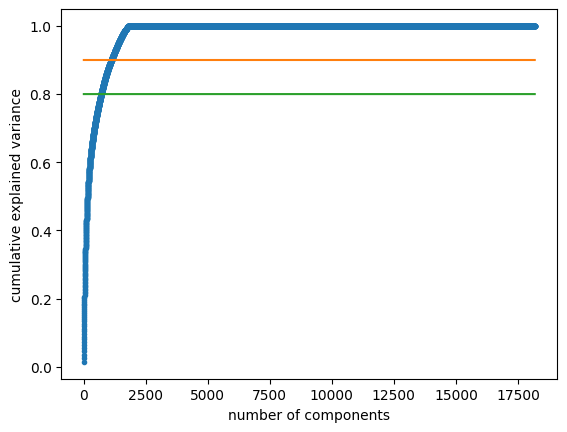

In [26]:
import matplotlib.pyplot as plt
plt.plot(cum_gene_imp['importance'], marker='.')
plt.plot([0.9]*len(cum_gene_imp), label="90% line " )
plt.plot([0.8]*len(cum_gene_imp), label="80% line")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, 'feature(gene) importance')

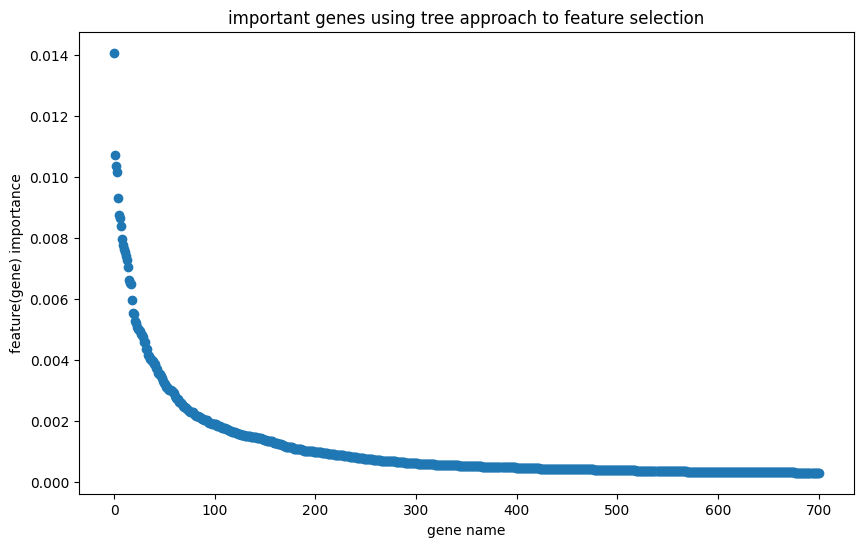

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(range(imp_gene_num), gene_imp_sorted['importance'][:imp_gene_num])
plt.title('important genes using tree approach to feature selection')
plt.xlabel('gene name')
plt.ylabel('feature(gene) importance')


### violon plot for a selected important gene

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_violon_gene(df, selected_gene):
        # Map the social setting abbreviations to full descriptions
        social_setting_map = {
        'ISO': 'Isolated',
        'KFC': 'Known Female Continuous',
        'KF': 'Known Female Reunited',
        'NF': 'Novel Female'
        }
        df['social_settting'] = df['social_setting'].map(social_setting_map)

        sns.set(style="whitegrid", palette="pastel", color_codes=True)

        f, ax = plt.subplots(figsize=(8, 8))

        # Draw a nested violinplot and split the violins for easier comparison
        sns.violinplot(x="social_setting", y=selected_gene, hue='study_group', data=df, 
                        split=True, linewidth=2.5, inner="quart", palette='Set2')
        sns.despine(left=True)

        f.suptitle('Gene Expression of ' + selected_gene + ' Across Study Groups and Social Settings'
                , fontsize=18, fontweight='bold')
        ax.set_xlabel('Social Setting')
        ax.set_ylabel('Expression Level (CPM)')
        plt.legend(loc='upper left', title='Study Group')


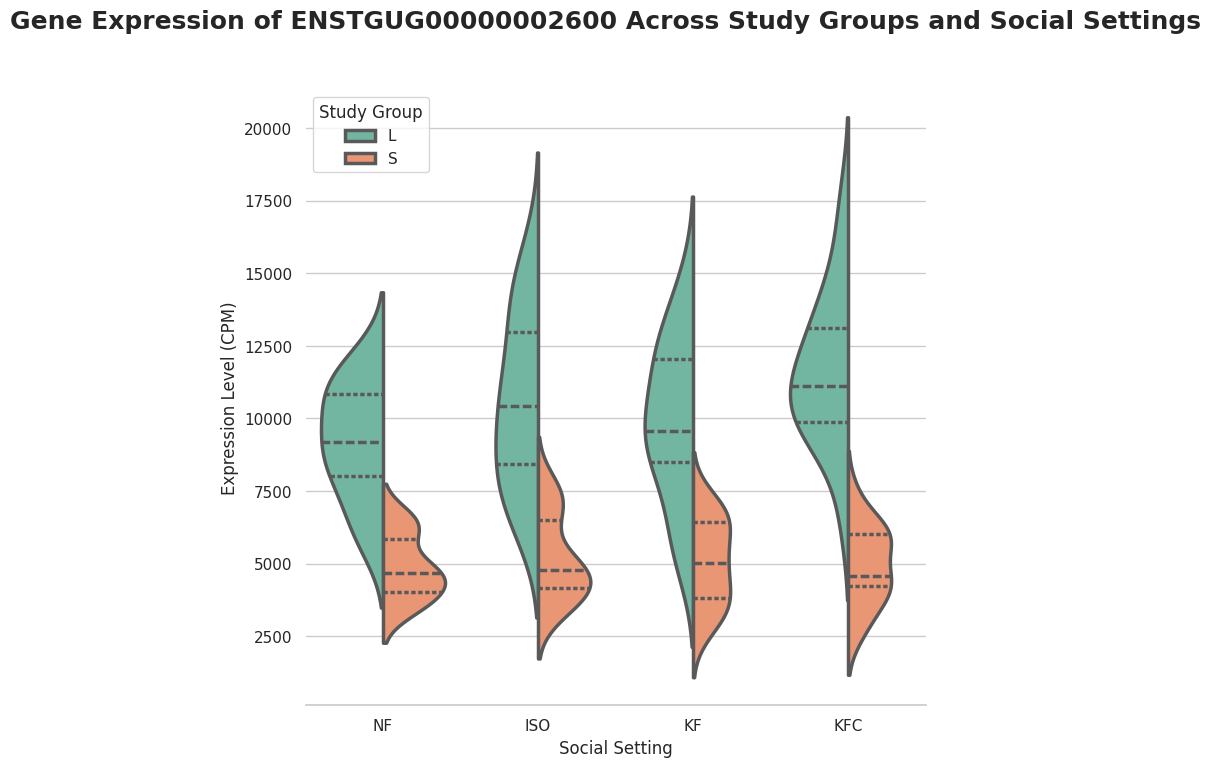

In [49]:
selected_gene = 'ENSTGUG00000002600'
plot_violon_gene(df, selected_gene)

### apply ttest for selected gene

In [50]:
import scipy.stats as stats

In [4]:
selected_gene = 'ENSTGUG00000002600'

In [51]:
l_group = df[[selected_gene]].loc[(df['study_group']=='L') & (df['social_setting']=='ISO')]
s_group = df[[selected_gene]].loc[(df['study_group']=='S') & (df['social_setting']=='ISO')]

In [75]:
from statsmodels.stats.weightstats import ttest_ind

In [74]:
stats.ttest_ind(a=l_group, b=s_group, equal_var=False, alternative='less')

TtestResult(statistic=array([6.94220364]), pvalue=array([0.99999986]), df=array([24.95018224]))

### Question

**Write down your interpretation of the result of this simple barplot, that displays expression level of `BDNF` gene. First, briefly describe `BDNF` and it's function. Then, write your interpretation about any notable observation you see from the plot**

**_Your Answer_**:
BDNF plays a crucial role in neuro-development, synaptic plasticity, and the maintenance of neuronal health. It promotes the growth and maturation of neurons during development and is essential for the formation and maintenance of synapses, which are the connections between neurons. BDNF also supports the survival of existing neurons and promotes the growth of new neurons, a process known as neuro-genesis.
In this violon plot the difference between expression data between different social groups in both treatment(L) and control(S) is noticable and somehow in both group expressions tend to have the same pattern in social groups, to testify our observation, I've applies ttest to check if the difference is randomly possible or is the cause of conditions, for this selected gene the p-value is noe less than 0.05!!


### heatmap plots to compare gene expressions

In [55]:
expression_data_selected = expression_data[gene_imp_sorted['gene'][:imp_gene_num]]
heatmap_data_selected = metadata_cols[['social_setting','study_group']].join(expression_data_selected)
heatmap_data_selected

,social_setting,study_group,ENSTGUG00000008354,ENSTGUG00000001109,ENSTGUG00000006574,ENSTGUG00000006260,ENSTGUG00000017314,ENSTGUG00000009836,ENSTGUG00000001601,ENSTGUG00000001849,...,ENSTGUG00000007296,ENSTGUG00000008974,ENSTGUG00000008794,ENSTGUG00000012945,ENSTGUG00000003764,ENSTGUG00000011340,ENSTGUG00000009219,ENSTGUG00000005720,ENSTGUG00000004562,ENSTGUG00000016570
sample_id,,,,,,,,,,,,,,,,,,,,,
GSM6175777,NF,L,14887.425637,8814.102564,19773.725581,9157.007697,13859.066953,10392.984735,18047.123044,14717.589663,...,11330.815374,5948.380496,7501.058617,15801.354402,6375.739156,15529.071867,6723.334774,7780.213462,5099.302201,4639.175258
GSM6175779,ISO,S,873.978290,2403.846154,158.941163,2281.646436,1951.981261,2273.465411,2172.338885,326.603931,...,7948.850873,8436.067448,4899.885064,6772.009029,5483.796373,9028.530155,6435.191855,6414.633270,4751.981308,8247.422680
GSM6175780,ISO,L,3267.487014,6009.615385,3287.192232,10921.480941,15030.255710,5521.273141,10137.581463,4572.455041,...,8689.427041,6790.984141,5928.256004,11286.681716,5770.098995,7222.824124,15159.519121,6019.333741,5340.058729,12113.402062
GSM6175781,ISO,L,8451.767323,19631.410256,8113.223905,14328.739619,20300.605114,11302.370900,9747.674483,27210.190043,...,20464.588116,8315.695499,9255.338455,3762.227239,7300.716858,13362.224630,12630.264611,6863.837280,4901.960784,10309.278351
GSM6175782,ISO,L,13040.153343,10817.307692,13921.800948,13750.722521,12102.283818,12861.318610,14426.558235,9328.624793,...,11824.532820,5296.365770,6049.240820,9781.790820,6067.413256,7403.394727,10052.986281,6073.238222,5300.590446,7731.958763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM6175906,KFC,L,56023.994677,29647.435897,43997.803722,24246.296127,23033.378880,26956.804157,11920.013368,25536.344894,...,7356.389938,7282.502934,11009.618293,12791.572611,8104.566527,7945.106537,14167.026845,10008.265354,9476.334817,8247.422680
GSM6175907,KFC,S,566.099574,3605.769231,346.780719,2920.507438,0.000000,6235.790841,3119.255835,428.667660,...,5899.923474,9499.353001,10404.694211,12039.127163,8622.113574,9028.530155,8372.152588,12146.476444,10668.276973,6185.567010
GSM6175908,KFC,L,8640.467181,21233.974359,7990.405733,10160.932129,17567.831349,7534.913933,19940.956943,8675.416930,...,8590.683552,7362.750900,9255.338455,15048.908954,11198.837171,6139.400506,7507.723831,8552.844360,10688.011114,10309.278351


In [56]:
hm_data_selected_control = heatmap_data_selected[heatmap_data_selected['study_group']=='S'].drop(columns=['study_group'])
hm_data_selected_treat = heatmap_data_selected[heatmap_data_selected['study_group']=='L'].drop(columns=['study_group'])
print(hm_data_selected_control.shape,hm_data_selected_treat.shape)
hm_data_selected_mean_control = hm_data_selected_control.groupby('social_setting').agg('mean')
hm_data_selected_mean_treat = hm_data_selected_treat.groupby('social_setting').agg('mean')
hm_data_selected_std_control = hm_data_selected_control.groupby('social_setting').agg('std')
hm_data_selected_std_treat = hm_data_selected_treat.groupby('social_setting').agg('std')
print(hm_data_selected_mean_control.shape)
print(hm_data_selected_mean_treat.shape)

(66, 702) (65, 702)
(4, 701)
(4, 701)


[Text(0.5, 159.44444444444443, 'samples std selected gene expressions for studied conditions - control group')]

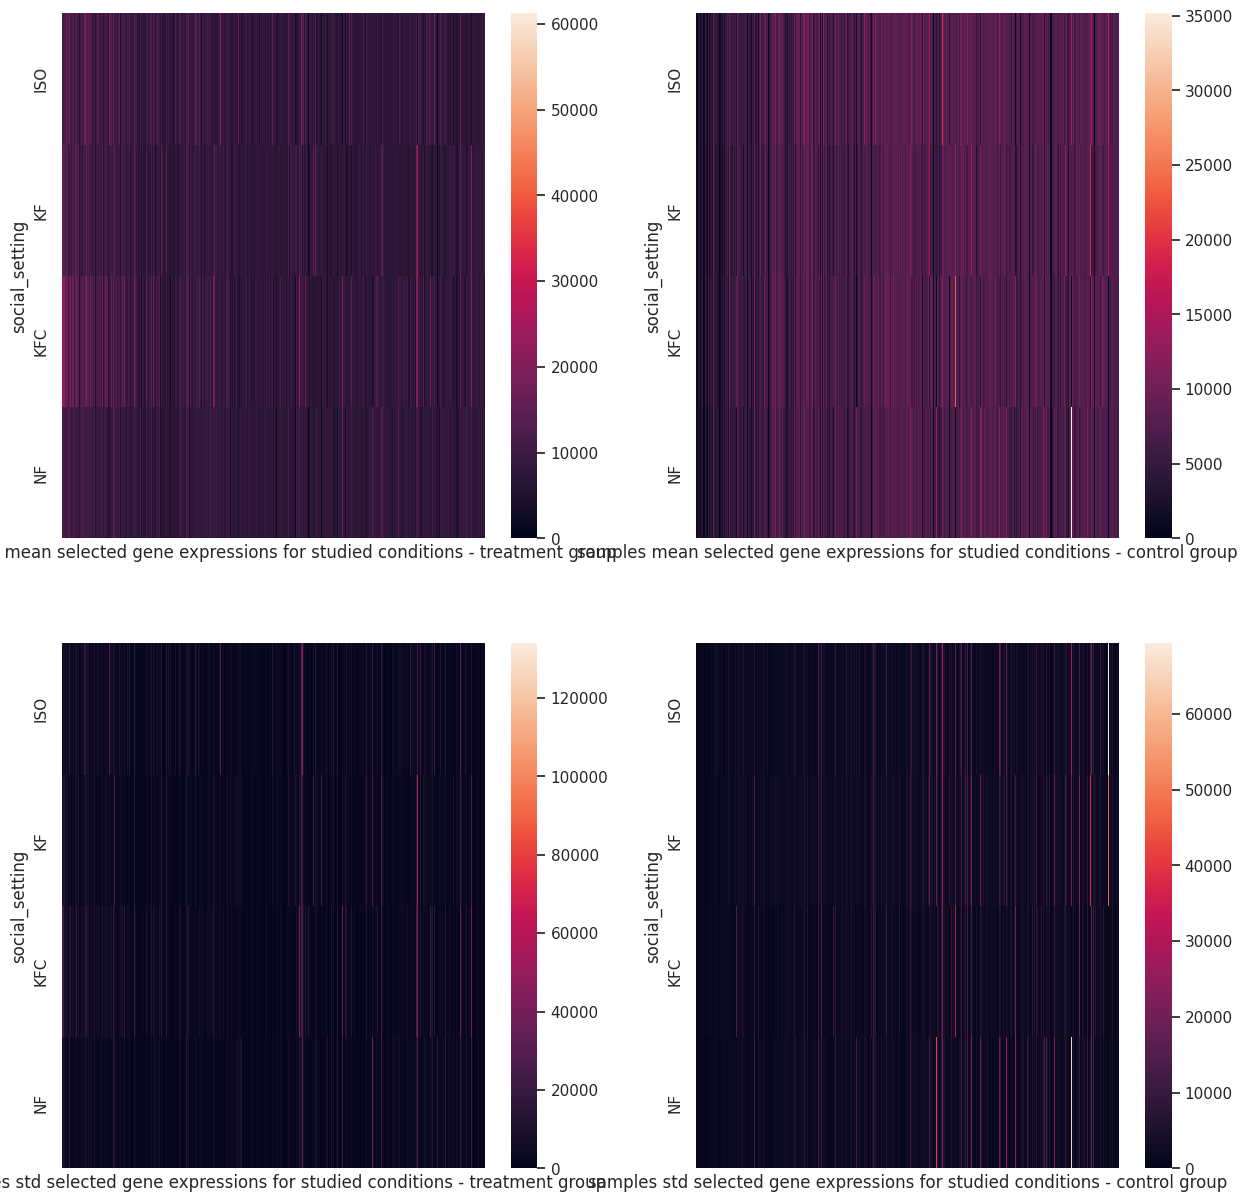

In [57]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))
sns.heatmap(hm_data_selected_mean_treat, ax=axs[0][0], xticklabels=False)
sns.heatmap(hm_data_selected_mean_control, ax=axs[0][1], xticklabels=False)
sns.heatmap(hm_data_selected_std_treat, ax=axs[1][0], xticklabels=False)
sns.heatmap(hm_data_selected_std_control, ax=axs[1][1], xticklabels=False)

axs[0][0].set(xlabel="samples mean selected gene expressions for studied conditions - treatment group",)
axs[0][1].set(xlabel="samples mean selected gene expressions for studied conditions - control group",)
axs[1][0].set(xlabel="samples std selected gene expressions for studied conditions - treatment group",)
axs[1][1].set(xlabel="samples std selected gene expressions for studied conditions - control group",)

## using Lasso to extract important features

In [58]:
labels = pd.DataFrame(metadata_cols['study_group'])
labels['study_group'] = labels['study_group'].astype('category')
labels['study_group'] = labels['study_group'].cat.codes
labels

,study_group
sample_id,
GSM6175777,0
GSM6175779,1
GSM6175780,0
GSM6175781,0
GSM6175782,0
...,...
GSM6175906,0
GSM6175907,1
GSM6175908,0


In [59]:
from sklearn.linear_model import LassoCV
import numpy as np
lasso = LassoCV(cv=5).fit(expression_data, labels)
coef = np.abs(lasso.coef_)


/home/saadi/miniconda3/envs/intro_bio/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
pd.DataFrame(coef).to_csv('./dataset/gene_coef.csv')

In [62]:
k=700
important_genes = coef.argsort()[-k:][::-1]
expression_data_selected = expression_data.iloc[:, important_genes]
expression_data_selected

,ENSTGUG00000001666,ENSTGUG00000014128,ENSTGUG00000016849,ENSTGUG00000003812,ENSTGUG00000009631,ENSTGUG00000007096,ENSTGUG00000012315,ENSTGUG00000011092,ENSTGUG00000003123,ENSTGUG00000013355,...,ENSTGUG00000017187,ENSTGUG00000004494,ENSTGUG00000001317,ENSTGUG00000013967,ENSTGUG00000000052,ENSTGUG00000010761,ENSTGUG00000003822,ENSTGUG00000015198,ENSTGUG00000017174,ENSTGUG00000014417
sample_id,,,,,,,,,,,,,,,,,,,,,
GSM6175777,13426.303687,0.000000,0.0,11142.061281,10617.658471,8109.004311,5701.254276,9779.951100,2830.452111,5755.395683,...,3797.468354,14733.417198,6789.524733,19379.844961,111111.111111,0.0,1074.113856,13157.894737,7674.144038,9395.184968
GSM6175779,8753.059862,8797.653959,0.0,16713.091922,9383.047021,7053.929400,10262.257697,0.000000,2817.759500,2877.697842,...,10126.582278,7196.849935,11962.495959,7751.937984,0.000000,0.0,1074.113856,7017.543860,7182.211728,3425.327853
GSM6175780,8159.632075,13196.480938,0.0,8356.545961,8042.611732,6179.724475,6271.379704,4889.975550,3820.475719,0.000000,...,10126.582278,7297.756072,2909.796314,0.000000,0.000000,0.0,0.000000,4385.964912,8559.622196,14288.510472
GSM6175781,8604.702915,8504.398827,0.0,33426.183844,8571.730925,10279.444126,8551.881414,2444.987775,2855.837332,4316.546763,...,1265.822785,5127.152945,11315.874555,3875.968992,0.000000,0.0,3222.341568,4385.964912,4919.323101,9982.384028
GSM6175782,6527.705660,6451.612903,0.0,2785.515320,6419.979541,5426.099539,7981.755986,7334.963325,3528.545681,1438.848921,...,1265.822785,9012.039223,3879.728419,0.000000,0.000000,0.0,0.000000,7017.543860,3148.366785,18105.304365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM6175906,6230.991766,0.000000,0.0,2785.515320,5114.818865,9435.384198,3420.752566,19559.902200,9227.527733,14388.489209,...,1265.822785,9896.649692,6789.524733,19379.844961,0.000000,0.0,0.000000,14035.087719,6198.347107,20062.634566
GSM6175907,5785.920926,13489.736070,0.0,0.000000,6349.430315,9375.094203,14253.135690,0.000000,11410.656716,33093.525180,...,6329.113924,8992.979175,9376.010346,11627.906977,0.000000,0.0,27926.960258,23684.210526,2558.048013,6165.590135
GSM6175908,7492.025814,6158.357771,0.0,2785.515320,11428.974567,9344.949206,7411.630559,4889.975550,12248.369000,23021.582734,...,15189.873418,14883.655224,7112.835435,34883.720930,0.000000,0.0,12889.366273,6140.350877,10330.578512,8318.653357


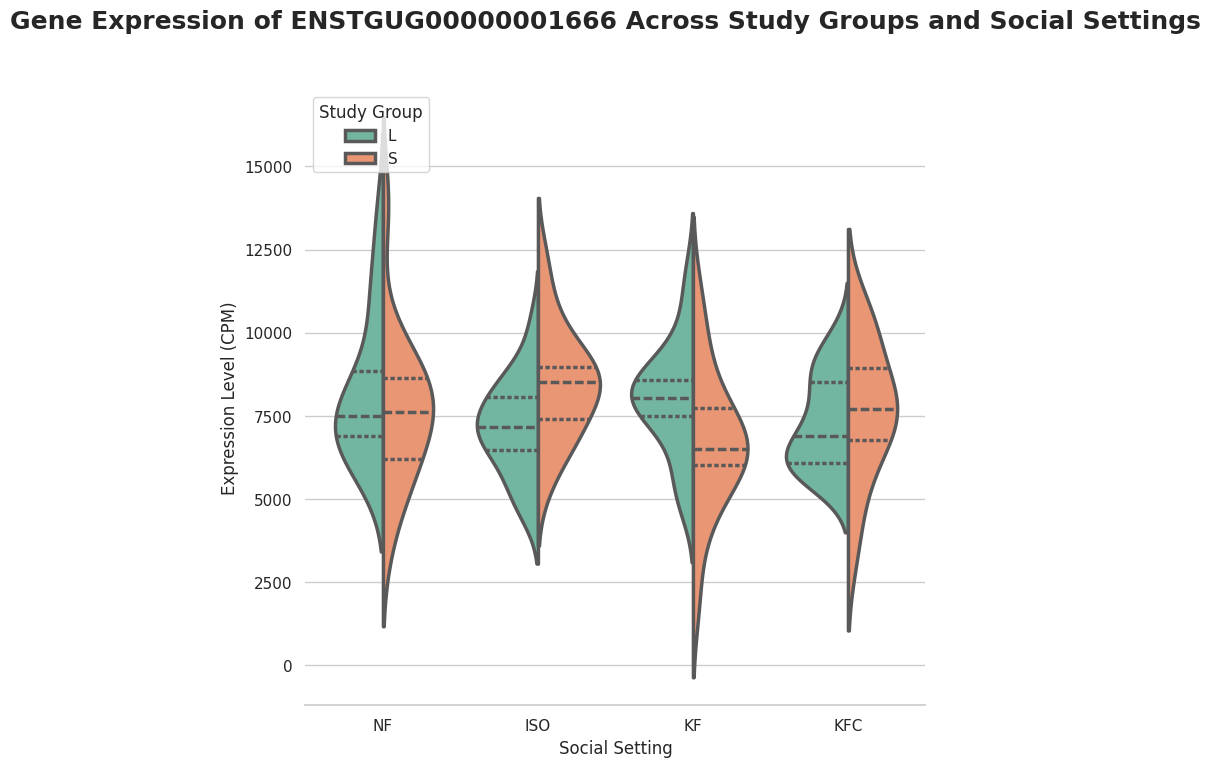

In [63]:

# Select a gene for visualization (example: 'ENSTGUG00000004743', which is Brain-Derived Neurotrophic Factor gene)
selected_gene = 'ENSTGUG00000001666'

plot_violon_gene(df,selected_gene)

In [64]:
heatmap_data_selected = metadata_cols[['social_setting','study_group']].join(expression_data_selected)

In [65]:
hm_data_selected_control = heatmap_data_selected[heatmap_data_selected['study_group']=='S'].drop(columns=['study_group'])
hm_data_selected_treat = heatmap_data_selected[heatmap_data_selected['study_group']=='L'].drop(columns=['study_group'])
print(hm_data_selected_control.shape,hm_data_selected_treat.shape)
hm_data_selected_mean_control = hm_data_selected_control.groupby('social_setting').agg('mean')
hm_data_selected_mean_treat = hm_data_selected_treat.groupby('social_setting').agg('mean')
hm_data_selected_std_control = hm_data_selected_control.groupby('social_setting').agg('std')
hm_data_selected_std_treat = hm_data_selected_treat.groupby('social_setting').agg('std')
print(hm_data_selected_mean_control.shape)
print(hm_data_selected_mean_treat.shape)

(66, 701) (65, 701)
(4, 700)
(4, 700)


[Text(0.5, 159.44444444444443, 'samples std selected gene expressions for studied conditions - control group')]

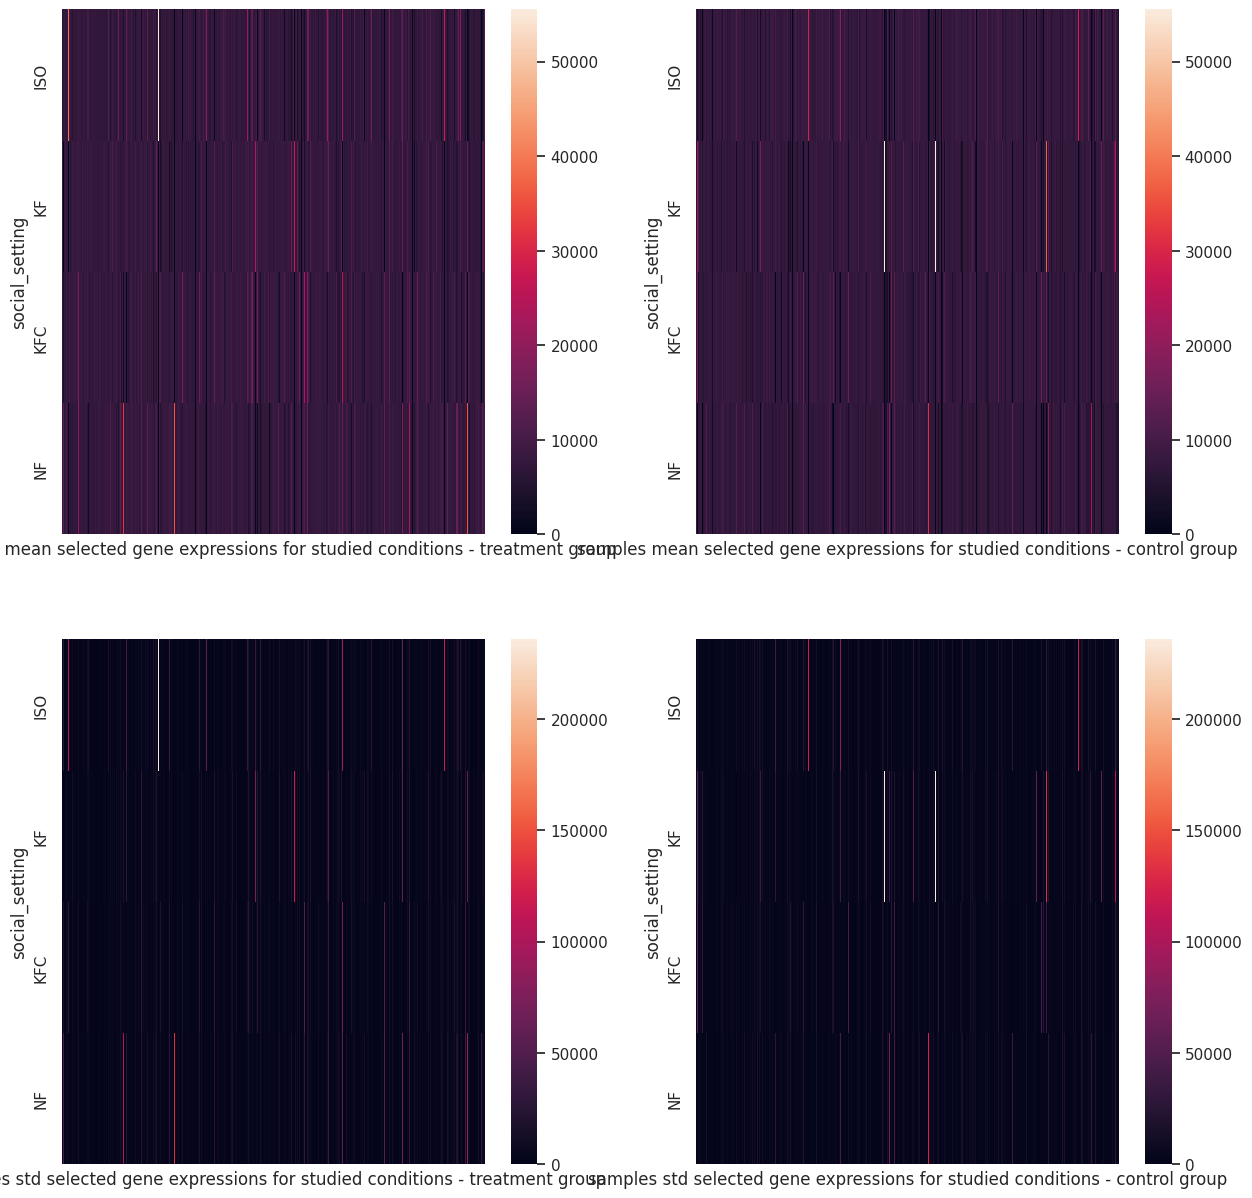

In [66]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))
sns.heatmap(hm_data_selected_mean_treat, ax=axs[0][0], xticklabels=False)
sns.heatmap(hm_data_selected_mean_control, ax=axs[0][1], xticklabels=False)
sns.heatmap(hm_data_selected_std_treat, ax=axs[1][0], xticklabels=False)
sns.heatmap(hm_data_selected_std_control, ax=axs[1][1], xticklabels=False)

axs[0][0].set(xlabel="samples mean selected gene expressions for studied conditions - treatment group",)
axs[0][1].set(xlabel="samples mean selected gene expressions for studied conditions - control group",)
axs[1][0].set(xlabel="samples std selected gene expressions for studied conditions - treatment group",)
axs[1][1].set(xlabel="samples std selected gene expressions for studied conditions - control group",)

[Text(0.5, 49.444444444444436, "the difference between sample's std gene expression of treatment group and control group")]

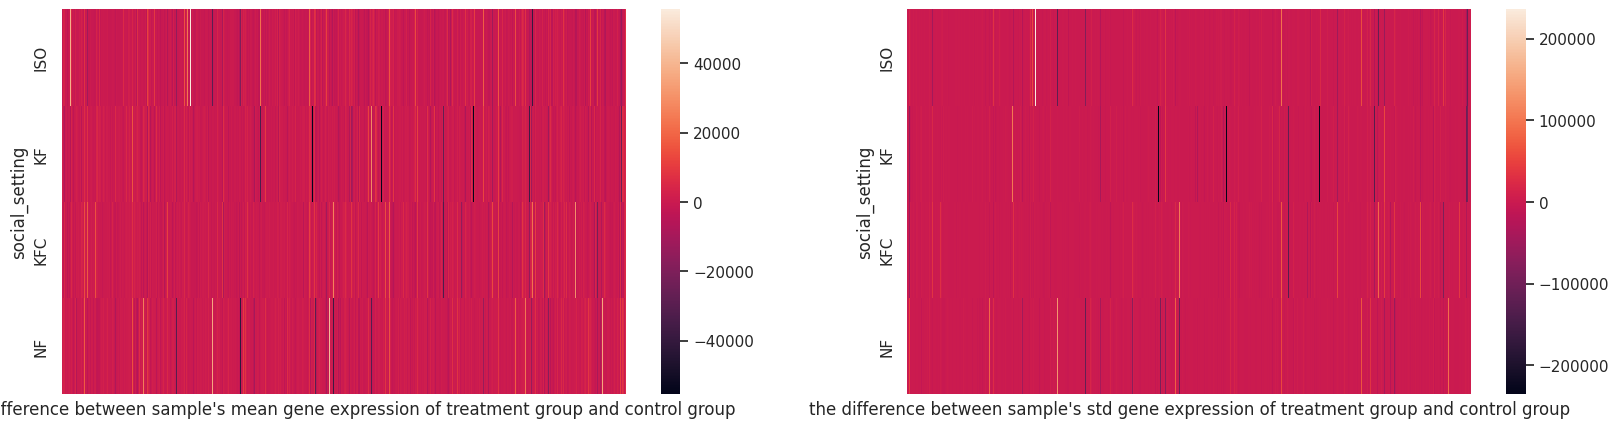

In [67]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 5))
sns.heatmap(hm_data_selected_mean_treat-hm_data_selected_mean_control, ax=axs[0], xticklabels=False)
sns.heatmap(hm_data_selected_std_treat-hm_data_selected_std_control, ax=axs[1], xticklabels=False)
axs[0].set(xlabel="the difference between sample's mean gene expression of treatment group and control group")
axs[1].set(xlabel="the difference between sample's std gene expression of treatment group and control group")


## PCA

In [76]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Load the normalized dataset
df = pd.read_csv('./dataset/transformed_dataset.csv')
metadata_cols = ['sample_id', 'social_setting', 'study_group', 'tissue_id']
expression_data = df.drop(columns=metadata_cols)


# Standardize the data
scaler = StandardScaler()
expression_scaled = scaler.fit_transform(expression_data)

Text(0, 0.5, 'cumulative explained variance')

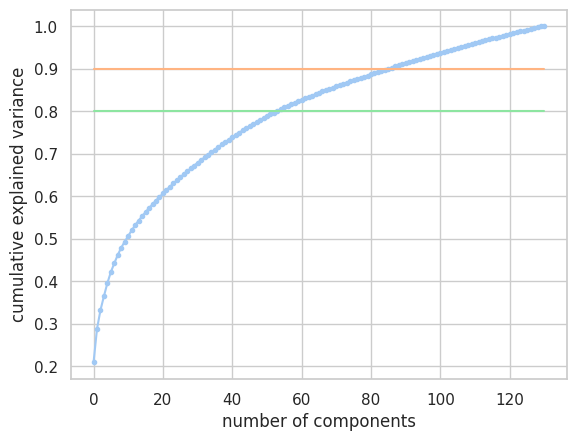

In [77]:
# Placeholder for PCA Analysis. 
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Note: Before applying PCA, it's important to standardize the data
# Example: Standardize the gene expression data (excluding metadata columns)
df = pd.read_csv('./dataset/transformed_dataset.csv')
metadata_cols = ['sample_id', 'social_setting', 'study_group', 'tissue_id']
expression_data = df.drop(columns=metadata_cols)

# Standardize the data
scaler = StandardScaler()
expression_scaled = scaler.fit_transform(expression_data)

pca = PCA().fit(expression_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), marker='.')
plt.plot([0.9]*len(pca.explained_variance_ratio_), label="90% line " )
plt.plot([0.8]*len(pca.explained_variance_ratio_), label="80% line")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


In [78]:
import numpy as np
component_num = np.where(pca.explained_variance_ratio_.cumsum()>0.80)[0][0]

In [79]:
data_new = PCA().fit_transform(expression_scaled)
data_new = pd.DataFrame(data_new)

In [80]:
data_new.columns

RangeIndex(start=0, stop=131, step=1)

In [81]:
pca_data = data_new.iloc[:,:component_num]

In [82]:
pca_data.shape

(131, 53)

In [83]:
metadata_columns = df[metadata_cols]

because in PCA, components are in different dimention the Gene ids will be lost but it could be applied to cluster samples only and not for gene expression analysis

so we use the PCs to classify samples into four group and see if we can recognize the effect of environment on gene expression?!

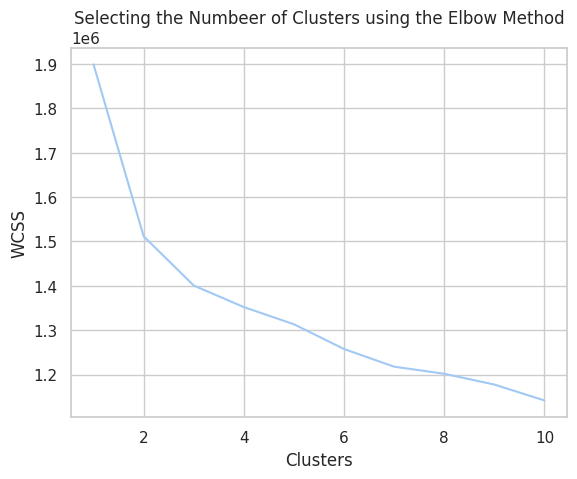

In [88]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [90]:
kmeans = KMeans(n_clusters=4)
samples_groups = kmeans.fit_predict(pca_data)

In [91]:
metadata_columns['cluster'] = samples_groups
metadata_columns

/tmp/ipykernel_609436/3609497218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_columns['cluster'] = samples_groups


,sample_id,social_setting,study_group,tissue_id,cluster
0,GSM6175777,NF,L,HY3,0
1,GSM6175779,ISO,S,HY5,1
2,GSM6175780,ISO,L,HY6,1
3,GSM6175781,ISO,L,HY8,1
4,GSM6175782,ISO,L,HY9,1
...,...,...,...,...,...
126,GSM6175906,KFC,L,TN67,2
127,GSM6175907,KFC,S,TN68,2
128,GSM6175908,KFC,L,TN69,2
129,GSM6175909,KFC,S,TN70,3


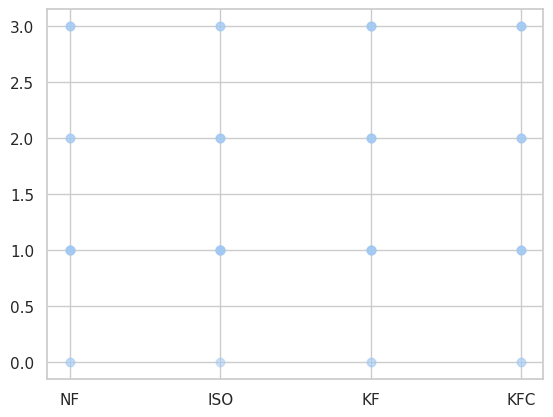

In [96]:
fig, ax = plt.subplots()
ax.scatter(metadata_columns['social_setting'], metadata_columns['cluster'],
            alpha=0.2)
plt.show()

## Questions

application of KMeans clustering helps us to understand the difference between clusters detected and the social groups that has been applied in real. This plot tries to detect this relationship and clearly the clustering algorithm was poor and inaccurate, we can validate it with external data like this group of settings we have better,and try other kinda algorithms!(I couldn't go further because of lack of time... )

### Reflecting on Visualizations to Extract Key Insights

As we have navigated through different visualization strategies, it's time to consolidate the knowledge you've gained. Reflect on the insights each visualization has provided:

- **What trends have you observed in the distribution of gene expression levels?**
- **How do the expression levels compare when you look across different conditions or samples?**
- **From the heatmap, were you able to detect any consistent patterns of expression, such as upregulation or downregulation of certain genes?**
- **Did any outliers or unusual expression patterns emerge? What might these suggest about certain genes or the overall data quality?**

Write down your observations and hypotheses. Discuss and note down your interpretations as they will be valuable for the upcoming stages of differential gene expression analysis.

**_Your Answer_**:
- obviously some genes are playing crucial rules and change over conditions and some genes are acting like Houskeeping genes, and to investigate deeper we can focus on importance genes
another observation due to heatmap plots  above, gene expression in KF condition is slightly different

- 

# DEG analysis

In [2]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

import pandas as pd

In [3]:
df = pd.read_csv('./dataset/transformed_dataset.csv')
# dop columns containing Nan
df = df.dropna(axis='columns')
df.loc[:, df.isna().any()]

""
0
1
2
3
4
...
126
127
128
129


In [4]:
metadata_cols_names = ['sample_id', 'social_setting', 'study_group', 'tissue_id']
expression_data = df.drop(columns=metadata_cols_names[1:]).set_index('sample_id')
expression_data

,ENSTGUG00000008284,ENSTGUG00000003938,ENSTGUG00000011987,ENSTGUG00000017592,ENSTGUG00000009442,ENSTGUG00000009764,ENSTGUG00000015152,ENSTGUG00000002407,ENSTGUG00000016201,ENSTGUG00000004296,...,ENSTGUG00000010786,ENSTGUG00000004644,ENSTGUG00000006386,ENSTGUG00000017785,ENSTGUG00000001573,ENSTGUG00000014656,ENSTGUG00000003563,ENSTGUG00000002845,ENSTGUG00000009990,ENSTGUG00000001666
sample_id,,,,,,,,,,,,,,,,,,,,,
GSM6175777,145,25,915,5,226,94,57,422,0,5013,...,443,493,722,0,0,0,1473,43,276,181
GSM6175779,149,21,938,5,221,76,51,407,0,4007,...,327,433,523,0,0,0,1522,37,145,118
GSM6175780,121,29,638,14,257,126,16,353,0,5513,...,350,370,395,0,2,1,1320,22,174,110
GSM6175781,159,22,900,5,202,178,33,298,0,3689,...,418,435,389,0,26,5,1542,57,219,116
GSM6175782,172,38,749,4,197,94,13,268,1,4162,...,274,342,291,0,0,5,1267,24,157,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM6175906,158,52,1225,3,216,112,67,731,0,4253,...,369,552,488,0,2,0,2768,37,335,84
GSM6175907,105,44,956,11,365,105,85,451,0,6771,...,469,575,628,0,3,0,3827,32,321,78
GSM6175908,143,53,1166,5,414,87,96,842,0,7380,...,491,556,406,0,0,3,4117,74,217,101


In [5]:
metadata_cols = df[metadata_cols_names].set_index('sample_id')
metadata_cols

,social_setting,study_group,tissue_id
sample_id,,,
GSM6175777,NF,L,HY3
GSM6175779,ISO,S,HY5
GSM6175780,ISO,L,HY6
GSM6175781,ISO,L,HY8
GSM6175782,ISO,L,HY9
...,...,...,...
GSM6175906,KFC,L,TN67
GSM6175907,KFC,S,TN68
GSM6175908,KFC,L,TN69


In [6]:
dds = DeseqDataSet(counts=expression_data,
            metadata=metadata_cols,
            design_factors=['social_setting', 'study_group'])

/tmp/ipykernel_553399/717681275.py:1: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts=expression_data,


In [7]:
dds.deseq2()

Fitting size factors...


... done in 0.36 seconds.

Fitting dispersions...
... done in 27.04 seconds.

Fitting dispersion trend curve...
... done in 1.54 seconds.

Fitting MAP dispersions...
... done in 22.26 seconds.

Fitting LFCs...
... done in 9.05 seconds.

Refitting 36 outliers.

Fitting dispersions...
... done in 0.08 seconds.

Fitting MAP dispersions...
... done in 0.07 seconds.

Fitting LFCs...
... done in 0.05 seconds.



In [8]:
dds

AnnData object with n_obs × n_vars = 131 × 18618
    obs: 'social-setting', 'study-group', 'tissue_id'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'

In [9]:
import warnings
warnings. filterwarnings('ignore')

In [10]:
stat_res = DeseqStats(dds)
stat_res.summary()

Running Wald tests...
... done in 6.69 seconds.



Log2 fold change & Wald test p-value: study-group S vs L
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSTGUG00000008284   139.532688       -0.021923  0.060938 -0.359760   
ENSTGUG00000003938    35.967245       -0.230279  0.100356 -2.294618   
ENSTGUG00000011987   823.687055        0.054222  0.053586  1.011877   
ENSTGUG00000017592     7.233779        0.412565  0.176141  2.342246   
ENSTGUG00000009442   244.108581        0.039438  0.054528  0.723250   
...                         ...             ...       ...       ...   
ENSTGUG00000014656     2.060085        0.415634  0.342969  1.211869   
ENSTGUG00000003563  2452.662301        0.025749  0.090382  0.284894   
ENSTGUG00000002845    57.097041       -0.142157  0.106536 -1.334354   
ENSTGUG00000009990   223.274451       -0.263821  0.050546 -5.219382   
ENSTGUG00000001666   102.317021       -0.011985  0.065706 -0.182400   

                          pvalue      padj  
ENSTGUG00000008284  7.190270e-01  0.887317  


In [11]:
res_df = stat_res.results_df
res_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSTGUG00000008284,139.532688,-0.021923,0.060938,-0.359760,7.190270e-01,0.887317
ENSTGUG00000003938,35.967245,-0.230279,0.100356,-2.294618,2.175501e-02,0.129092
ENSTGUG00000011987,823.687055,0.054222,0.053586,1.011877,3.115969e-01,0.616478
ENSTGUG00000017592,7.233779,0.412565,0.176141,2.342246,1.916806e-02,0.117804
ENSTGUG00000009442,244.108581,0.039438,0.054528,0.723250,4.695262e-01,0.741841
...,...,...,...,...,...,...
ENSTGUG00000014656,2.060085,0.415634,0.342969,1.211869,2.255627e-01,0.524489
ENSTGUG00000003563,2452.662301,0.025749,0.090382,0.284894,7.757255e-01,0.913940
ENSTGUG00000002845,57.097041,-0.142157,0.106536,-1.334354,1.820877e-01,0.468069
ENSTGUG00000009990,223.274451,-0.263821,0.050546,-5.219382,1.795215e-07,0.000006


In [12]:
res_df.sort_values(by='pvalue')

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSTGUG00000008863,1185.972249,-2.312061,0.070035,-33.013061,5.275807e-239,8.848584e-235
ENSTGUG00000002125,109.475059,-2.806433,0.096124,-29.195947,2.183154e-187,1.830793e-183
ENSTGUG00000001849,376.475797,-4.649276,0.169995,-27.349541,1.093553e-164,6.113688e-161
ENSTGUG00000010839,268.317982,-2.162065,0.082372,-26.247509,7.631292e-152,3.199801e-148
ENSTGUG00000001601,135.203214,-1.911368,0.077197,-24.759686,2.438391e-135,8.179337e-132
...,...,...,...,...,...,...
ENSTGUG00000016977,0.000000,NaN,NaN,NaN,NaN,NaN
ENSTGUG00000017946,0.000000,NaN,NaN,NaN,NaN,NaN
ENSTGUG00000014740,0.000000,NaN,NaN,NaN,NaN,NaN
ENSTGUG00000017985,0.000000,NaN,NaN,NaN,NaN,NaN


In [13]:
filtered_res = res_df[res_df.baseMean >= 10]
filtered_res = filtered_res.sort_values(by='pvalue')
filtered_res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSTGUG00000008863,1185.972249,-2.312061,0.070035,-33.013061,5.275807e-239,8.848584e-235
ENSTGUG00000002125,109.475059,-2.806433,0.096124,-29.195947,2.183154e-187,1.830793e-183
ENSTGUG00000001849,376.475797,-4.649276,0.169995,-27.349541,1.093553e-164,6.113688e-161
ENSTGUG00000010839,268.317982,-2.162065,0.082372,-26.247509,7.631292e-152,3.199801e-148
ENSTGUG00000001601,135.203214,-1.911368,0.077197,-24.759686,2.438391e-135,8.179337e-132
...,...,...,...,...,...,...
ENSTGUG00000005270,463.162432,-0.000023,0.059089,-0.000390,9.996890e-01,9.998777e-01
ENSTGUG00000007422,119.092552,0.000022,0.087913,0.000256,9.997961e-01,9.998777e-01
ENSTGUG00000002518,1128.591001,-0.000025,0.105095,-0.000241,9.998080e-01,9.998777e-01
ENSTGUG00000002307,182.490539,-0.000010,0.043143,-0.000228,9.998181e-01,9.998777e-01


In [12]:
sigs = filtered_res[(filtered_res.padj < 0.05) & (abs(filtered_res.log2FoldChange) > 0.5)]
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSTGUG00000008863,1185.972249,-2.312061,0.070035,-33.013061,5.275807e-239,8.848584e-235
ENSTGUG00000002125,109.475059,-2.806433,0.096124,-29.195947,2.183154e-187,1.830793e-183
ENSTGUG00000001849,376.475797,-4.649276,0.169995,-27.349541,1.093553e-164,6.113688e-161
ENSTGUG00000010839,268.317982,-2.162065,0.082372,-26.247509,7.631292e-152,3.199801e-148
ENSTGUG00000001601,135.203214,-1.911368,0.077197,-24.759686,2.438391e-135,8.179337e-132
...,...,...,...,...,...,...
ENSTGUG00000009949,17.905423,-0.796272,0.281934,-2.824323,4.738064e-03,4.258671e-02
ENSTGUG00000014655,18.039270,0.806102,0.286018,2.818358,4.826989e-03,4.313173e-02
ENSTGUG00000017798,13.274410,0.661224,0.235700,2.805360,5.026040e-03,4.451540e-02
ENSTGUG00000018015,17.933992,-0.862688,0.309986,-2.782986,5.386111e-03,4.671968e-02


### PCA

In [61]:
#PCA
import scanpy as sc

In [68]:
dds

AnnData object with n_obs × n_vars = 131 × 18618
    obs: 'social-setting', 'study-group', 'tissue_id'
    uns: 'pca', 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'X_pca', 'size_factors', 'replaceable'
    varm: 'PCs', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'

In [15]:
dds.varm

AxisArrays with keys: non_zero, _MoM_dispersions, genewise_dispersions, _genewise_converged, _normed_means, fitted_dispersions, MAP_dispersions, _MAP_converged, dispersions, _outlier_genes, LFC, _LFC_converged, replaced

In [69]:
sc.tl.pca(dds)

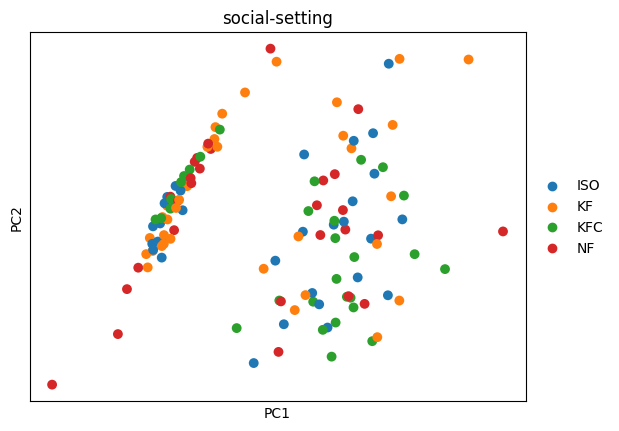

In [72]:
sc.pl.pca(dds, color = 'social-setting', size = 200)

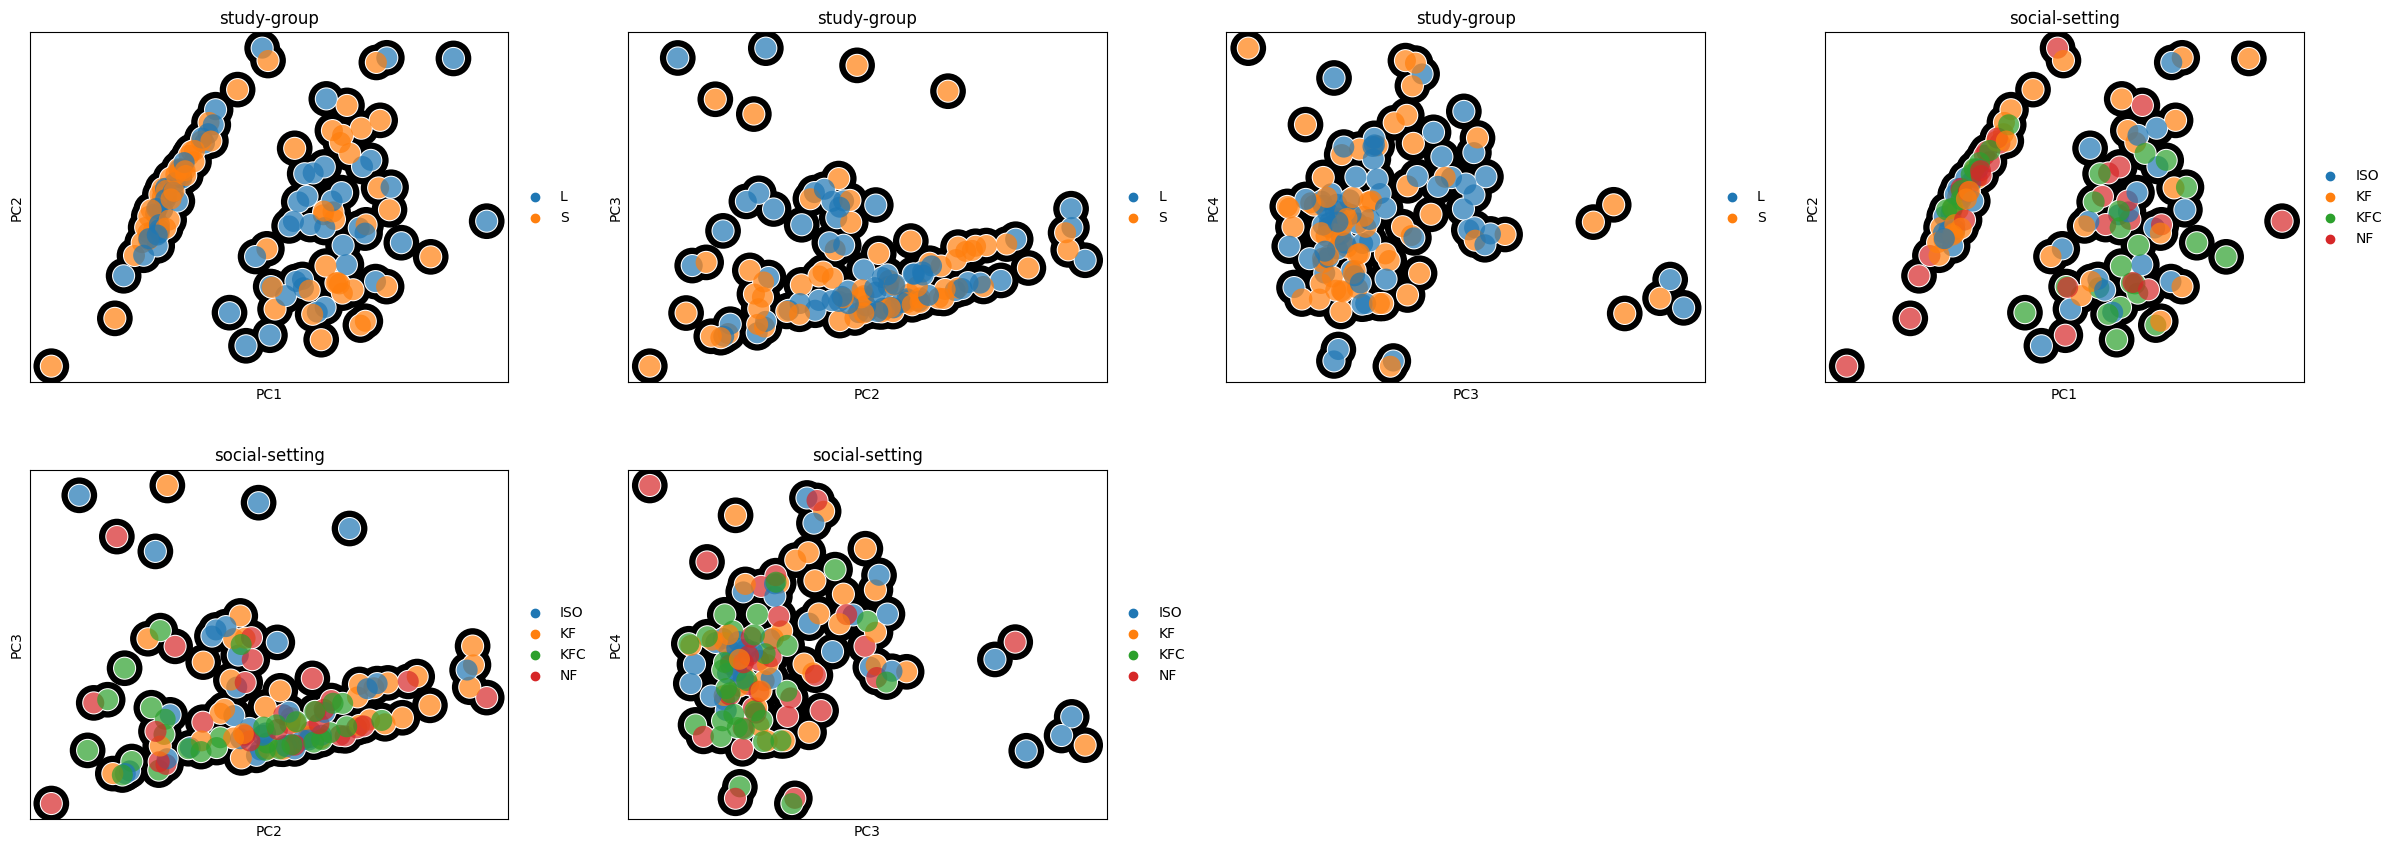

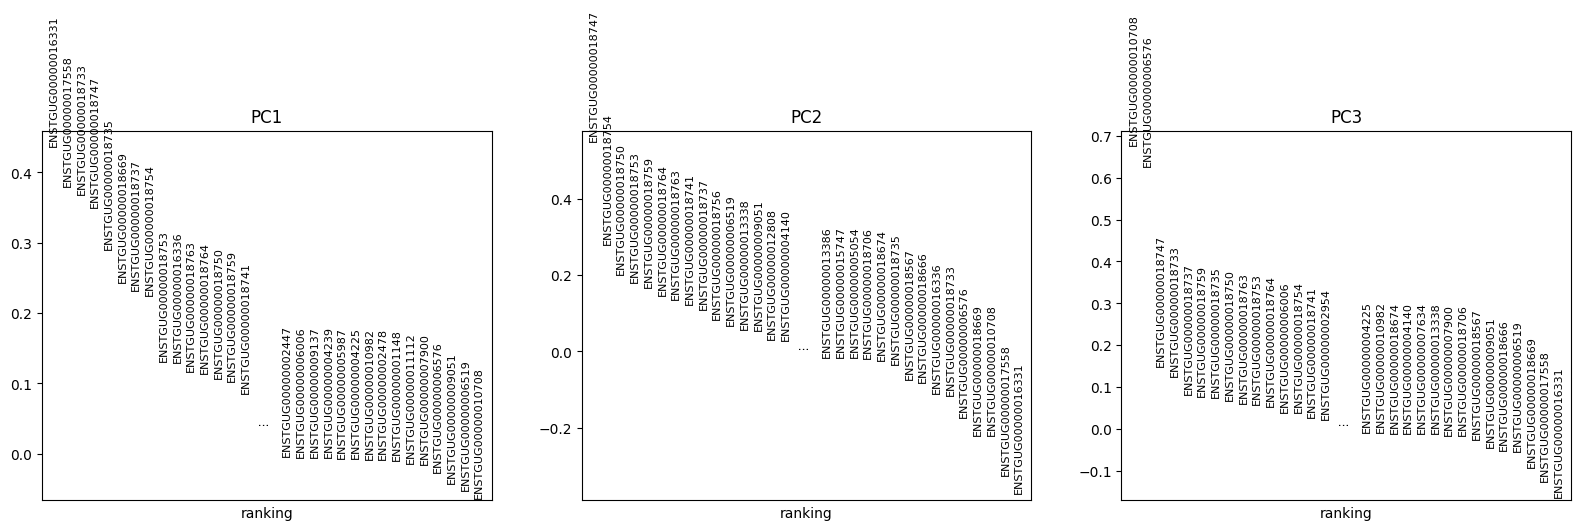

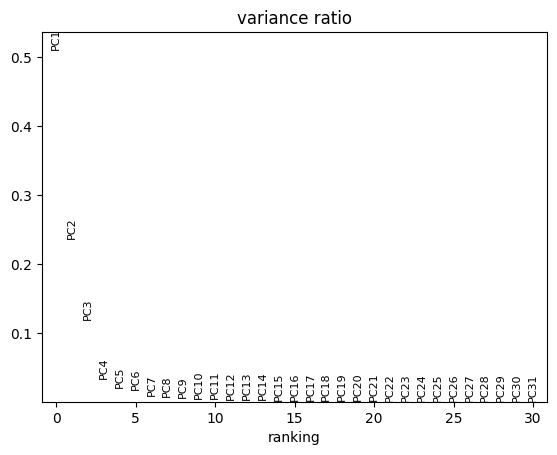

In [24]:
sc.pl.pca_overview(dds, 
                   color=["study-group","social-setting"], 
                   components = ['1,2', '2,3','3,4'],
                   ncols=4,
                   add_outline = True)
# 

### GSEA

In [14]:
import gseapy as gp
from gseapy.plot import gseaplot

In [15]:
filtered_res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSTGUG00000008863,1185.972249,-2.312061,0.070035,-33.013061,5.275807e-239,8.848584e-235
ENSTGUG00000002125,109.475059,-2.806433,0.096124,-29.195947,2.183154e-187,1.830793e-183
ENSTGUG00000001849,376.475797,-4.649276,0.169995,-27.349541,1.093553e-164,6.113688e-161
ENSTGUG00000010839,268.317982,-2.162065,0.082372,-26.247509,7.631292e-152,3.199801e-148
ENSTGUG00000001601,135.203214,-1.911368,0.077197,-24.759686,2.438391e-135,8.179337e-132
...,...,...,...,...,...,...
ENSTGUG00000005270,463.162432,-0.000023,0.059089,-0.000390,9.996890e-01,9.998777e-01
ENSTGUG00000007422,119.092552,0.000022,0.087913,0.000256,9.997961e-01,9.998777e-01
ENSTGUG00000002518,1128.591001,-0.000025,0.105095,-0.000241,9.998080e-01,9.998777e-01
ENSTGUG00000002307,182.490539,-0.000010,0.043143,-0.000228,9.998181e-01,9.998777e-01


In [16]:
filtered_res.index

Index(['ENSTGUG00000008863', 'ENSTGUG00000002125', 'ENSTGUG00000001849',
       'ENSTGUG00000010839', 'ENSTGUG00000001601', 'ENSTGUG00000003201',
       'ENSTGUG00000017314', 'ENSTGUG00000006260', 'ENSTGUG00000003925',
       'ENSTGUG00000012992',
       ...
       'ENSTGUG00000016600', 'ENSTGUG00000011936', 'ENSTGUG00000003212',
       'ENSTGUG00000004562', 'ENSTGUG00000008051', 'ENSTGUG00000005270',
       'ENSTGUG00000007422', 'ENSTGUG00000002518', 'ENSTGUG00000002307',
       'ENSTGUG00000011519'],
      dtype='object', length=13577)

In [1]:
import mygene
mg = mygene.MyGeneInfo()

In [ ]:
mg.getgene

In [17]:
gene_symbol = pd.DataFrame(mg.getgenes(list(filtered_res.index), species=59729 ,  field = 'symbol'))

In [18]:
gene_symbol

,query,_id,_version,symbol,notfound
0,ENSTGUG00000008863,100225790,1.0,SAAL1,NaN
1,ENSTGUG00000002125,105760857,1.0,OSMR,NaN
2,ENSTGUG00000001849,100220412,1.0,LOC100220412,NaN
3,ENSTGUG00000010839,ENSTGUG00000010839,1.0,CEBPD,NaN
4,ENSTGUG00000001601,105760841,2.0,LOC105760841,NaN
...,...,...,...,...,...
13585,ENSTGUG00000005270,100227042,1.0,ARID5B,NaN
13586,ENSTGUG00000007422,NaN,NaN,NaN,True
13587,ENSTGUG00000002518,100217797,1.0,PCLO,NaN
13588,ENSTGUG00000002307,NaN,NaN,NaN,True


In [19]:
gene_symbol = gene_symbol.rename(columns={'query':'index'})
gene_symbol

,index,_id,_version,symbol,notfound
0,ENSTGUG00000008863,100225790,1.0,SAAL1,NaN
1,ENSTGUG00000002125,105760857,1.0,OSMR,NaN
2,ENSTGUG00000001849,100220412,1.0,LOC100220412,NaN
3,ENSTGUG00000010839,ENSTGUG00000010839,1.0,CEBPD,NaN
4,ENSTGUG00000001601,105760841,2.0,LOC105760841,NaN
...,...,...,...,...,...
13585,ENSTGUG00000005270,100227042,1.0,ARID5B,NaN
13586,ENSTGUG00000007422,NaN,NaN,NaN,True
13587,ENSTGUG00000002518,100217797,1.0,PCLO,NaN
13588,ENSTGUG00000002307,NaN,NaN,NaN,True


In [20]:
filtered_res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSTGUG00000008863,1185.972249,-2.312061,0.070035,-33.013061,5.275807e-239,8.848584e-235
ENSTGUG00000002125,109.475059,-2.806433,0.096124,-29.195947,2.183154e-187,1.830793e-183
ENSTGUG00000001849,376.475797,-4.649276,0.169995,-27.349541,1.093553e-164,6.113688e-161
ENSTGUG00000010839,268.317982,-2.162065,0.082372,-26.247509,7.631292e-152,3.199801e-148
ENSTGUG00000001601,135.203214,-1.911368,0.077197,-24.759686,2.438391e-135,8.179337e-132
...,...,...,...,...,...,...
ENSTGUG00000005270,463.162432,-0.000023,0.059089,-0.000390,9.996890e-01,9.998777e-01
ENSTGUG00000007422,119.092552,0.000022,0.087913,0.000256,9.997961e-01,9.998777e-01
ENSTGUG00000002518,1128.591001,-0.000025,0.105095,-0.000241,9.998080e-01,9.998777e-01
ENSTGUG00000002307,182.490539,-0.000010,0.043143,-0.000228,9.998181e-01,9.998777e-01


In [23]:
result_sym = filtered_res.merge(gene_symbol[['index','symbol']],left_index=True,right_on='index')
result_sym = result_sym.rename(columns={'index':'Geneid'}).set_index('Geneid')
result_sym

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Geneid,,,,,,,
ENSTGUG00000008863,1185.972249,-2.312061,0.070035,-33.013061,5.275807e-239,8.848584e-235,SAAL1
ENSTGUG00000002125,109.475059,-2.806433,0.096124,-29.195947,2.183154e-187,1.830793e-183,OSMR
ENSTGUG00000001849,376.475797,-4.649276,0.169995,-27.349541,1.093553e-164,6.113688e-161,LOC100220412
ENSTGUG00000010839,268.317982,-2.162065,0.082372,-26.247509,7.631292e-152,3.199801e-148,CEBPD
ENSTGUG00000001601,135.203214,-1.911368,0.077197,-24.759686,2.438391e-135,8.179337e-132,LOC105760841
...,...,...,...,...,...,...,...
ENSTGUG00000005270,463.162432,-0.000023,0.059089,-0.000390,9.996890e-01,9.998777e-01,ARID5B
ENSTGUG00000007422,119.092552,0.000022,0.087913,0.000256,9.997961e-01,9.998777e-01,NaN
ENSTGUG00000002518,1128.591001,-0.000025,0.105095,-0.000241,9.998080e-01,9.998777e-01,PCLO


In [24]:
result_sym

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Geneid,,,,,,,
ENSTGUG00000008863,1185.972249,-2.312061,0.070035,-33.013061,5.275807e-239,8.848584e-235,SAAL1
ENSTGUG00000002125,109.475059,-2.806433,0.096124,-29.195947,2.183154e-187,1.830793e-183,OSMR
ENSTGUG00000001849,376.475797,-4.649276,0.169995,-27.349541,1.093553e-164,6.113688e-161,LOC100220412
ENSTGUG00000010839,268.317982,-2.162065,0.082372,-26.247509,7.631292e-152,3.199801e-148,CEBPD
ENSTGUG00000001601,135.203214,-1.911368,0.077197,-24.759686,2.438391e-135,8.179337e-132,LOC105760841
...,...,...,...,...,...,...,...
ENSTGUG00000005270,463.162432,-0.000023,0.059089,-0.000390,9.996890e-01,9.998777e-01,ARID5B
ENSTGUG00000007422,119.092552,0.000022,0.087913,0.000256,9.997961e-01,9.998777e-01,NaN
ENSTGUG00000002518,1128.591001,-0.000025,0.105095,-0.000241,9.998080e-01,9.998777e-01,PCLO


In [25]:
ranking = result_sym[['symbol', 'stat']].dropna().sort_values('stat', ascending = False)
ranking

,symbol,stat
Geneid,,
ENSTGUG00000003098,SH3BP4,20.147521
ENSTGUG00000007977,CA4,16.444003
ENSTGUG00000002606,PLEKHG5,15.264070
ENSTGUG00000011671,SLC7A1,11.751815
ENSTGUG00000001835,TREM2,10.877143
...,...,...
ENSTGUG00000001601,LOC105760841,-24.759686
ENSTGUG00000010839,CEBPD,-26.247509
ENSTGUG00000001849,LOC100220412,-27.349541


In [26]:
ranking = ranking.drop_duplicates('symbol')
ranking

,symbol,stat
Geneid,,
ENSTGUG00000003098,SH3BP4,20.147521
ENSTGUG00000007977,CA4,16.444003
ENSTGUG00000002606,PLEKHG5,15.264070
ENSTGUG00000011671,SLC7A1,11.751815
ENSTGUG00000001835,TREM2,10.877143
...,...,...
ENSTGUG00000001601,LOC105760841,-24.759686
ENSTGUG00000010839,CEBPD,-26.247509
ENSTGUG00000001849,LOC100220412,-27.349541


In [27]:
symbol_set = {'things':list(set(ranking['symbol']))}
symbol_set

{'things': ['RASD1',
  'SIRT4',
  'C1QTNF1',
  'HDAC10',
  'ERAL1',
  'PDCD11',
  'ECHDC3',
  'PLK2',
  'BRF1',
  'RNF180',
  'RUBCN',
  'MIOS',
  'SSH1',
  'MMP24',
  'PIGN',
  'TRAPPC9',
  'TRPM7',
  'SDR42E1',
  'LOC100219675',
  'KLHL29',
  'SLC39A10',
  'IPO5',
  'CETN2',
  'DAPK1',
  'CRHBP',
  'MINAR1',
  'LOC100229402',
  'DRG2',
  'KCNC2',
  'SPAST',
  'CALB1',
  'ITGB3BP',
  'DTX2',
  'LOC100228270',
  'HOMER1',
  'RAD51B',
  'CDC16',
  'CACNA1S',
  'PLEKHA7',
  'C1QTNF5',
  'GRIN2C',
  'R3HDM2',
  'LOC105759079',
  'DPH7',
  'HOMER2',
  'EYA2',
  'FILIP1L',
  'LOC100225628',
  'ZNF609',
  'TMED4',
  'TCP11L1',
  'NTAN1',
  'GRTP1',
  'NRK',
  'MFSD13A',
  'BAZ1A',
  'SH3GL2',
  'PWP2',
  'LOC100218541',
  'ERMP1',
  'ANKRD50',
  'NUCB2',
  'NADK',
  'CNTFR',
  'PDK1',
  'CAMKV',
  'MKRN2',
  'MED6',
  'POLD3',
  'LRRFIP2',
  'WWOX',
  'GNG10',
  'DYNLT1',
  'CD9',
  'ECRG4',
  'SERPINH1',
  'AMN',
  'NUP107',
  'SRBD1',
  'BLTP3B',
  'MALT1',
  'ZBTB17',
  'EIF2S3',
  'CNTNA

In [57]:
ranking = ranking.drop(columns=['level_0','index'])

In [64]:
ranking = ranking.rename(columns={'Geneid':0})
ranking = ranking.set_index(0)
ranking

,symbol,stat
0,,
ENSTGUG00000003098,SH3BP4,20.147521
ENSTGUG00000007977,CA4,16.444003
ENSTGUG00000002606,PLEKHG5,15.264070
ENSTGUG00000011671,SLC7A1,11.751815
ENSTGUG00000001835,TREM2,10.877143
...,...,...
ENSTGUG00000001601,LOC105760841,-24.759686
ENSTGUG00000010839,CEBPD,-26.247509
ENSTGUG00000001849,LOC100220412,-27.349541


In [79]:
new_rnk = ranking.reset_index().drop(columns = 0)

In [78]:
new_rnk = new_rnk.rename(columns={}).set_index('symbol')
new_rnk

,stat
symbol,
SH3BP4,20.147521
CA4,16.444003
PLEKHG5,15.264070
SLC7A1,11.751815
TREM2,10.877143
...,...
LOC105760841,-24.759686
CEBPD,-26.247509
LOC100220412,-27.349541


In [80]:
pre_res = gp.prerank(rnk = new_rnk,
                     gene_sets = ['GO_Biological_Process_2021', symbol_set],
                     seed = 6, permutation_num = 100)

2024-02-09 01:35:31,654 [WARNING] Duplicated values found in preranked stats: 0.14% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [81]:
out = []

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df

,Term,fdr,es,nes
0,GO_Biological_Process_2021__response to cytoki...,0.0,-0.675903,-2.274415
1,GO_Biological_Process_2021__inflammatory respo...,0.0,-0.691121,-2.185158
2,GO_Biological_Process_2021__defense response t...,0.0,-0.884445,-2.485620
3,GO_Biological_Process_2021__response to organi...,0.0,-0.738629,-2.188389
4,GO_Biological_Process_2021__cellular response ...,0.0,-0.840283,-2.211181
...,...,...,...,...
1766,GO_Biological_Process_2021__negative regulatio...,1.0,-0.159629,-0.371401
1767,GO_Biological_Process_2021__calcium ion transm...,1.0,-0.220485,-0.538524
1768,GO_Biological_Process_2021__inorganic anion tr...,1.0,-0.224787,-0.647864
1769,GO_Biological_Process_2021__regulation of cycl...,1.0,0.161425,0.494841


In [82]:
out_df.sort_values('nes').iloc[0].Term

'GO_Biological_Process_2021__defense response to symbiont (GO:0140546)'

In [90]:
gseaplot(pre_res.ranking,
         term = 'GO_Biological_Process_2021__defense response to symbiont (GO:0140546)',
         **pre_res.results['GO_Biological_Process_2021__defense response to symbiont (GO:0140546)'])


TypeError: gseaplot() got multiple values for argument 'term'

### plot cluster grid

In [29]:
import numpy as np
import seaborn as sns

In [30]:
dds.layers['normed_counts']

array([[ 130.74085516,   22.54152675,  825.0198791 , ...,   38.77142601,
         248.85845534,  163.20065368],
       [ 165.63036556,   23.34387703, 1042.6931738 , ...,   41.12968809,
         161.18391279,  131.17035662],
       [ 140.23883087,   33.61095947,  739.44110823, ...,   25.49796925,
         201.66575679,  127.48984625],
       ...,
       [ 111.78655171,   41.43137931,  911.49034473, ...,   57.8475862 ,
         169.63413791,   78.95413792],
       [ 109.29788745,   31.09336453,  538.00942874, ...,   52.76449739,
         255.34247844,  101.76010211],
       [ 157.04717174,   39.01793087,  913.0195823 , ...,   47.79696531,
         238.98482656,   84.86399964]])

In [31]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])
dds.layers['log1p']

array([[4.88083677, 3.15876596, 6.71661884, ..., 3.68314872, 5.52089458,
        5.10108918],
       [5.11577798, 3.19228036, 6.95052083, ..., 3.74075267, 5.08873096,
        4.88409167],
       [4.95045229, 3.54417038, 6.6072461 , ..., 3.2770681 , 5.3115581 ,
        4.85584988],
       ...,
       [4.72549711, 3.74788817, 6.8161775 , ..., 4.07495082, 5.13952172,
        4.38145319],
       [4.70318477, 3.4686493 , 6.28973306, ..., 3.98461335, 5.54651436,
        4.63239717],
       [5.06289354, 3.68932763, 6.817852  , ..., 3.88766812, 5.4805757 ,
        4.45276464]])

In [32]:
sigs = result_sym[(result_sym.padj < 0.05) & (abs(result_sym.log2FoldChange) > 0.5)]
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Geneid,,,,,,,
ENSTGUG00000008863,1185.972249,-2.312061,0.070035,-33.013061,5.275807e-239,8.848584e-235,SAAL1
ENSTGUG00000002125,109.475059,-2.806433,0.096124,-29.195947,2.183154e-187,1.830793e-183,OSMR
ENSTGUG00000001849,376.475797,-4.649276,0.169995,-27.349541,1.093553e-164,6.113688e-161,LOC100220412
ENSTGUG00000010839,268.317982,-2.162065,0.082372,-26.247509,7.631292e-152,3.199801e-148,CEBPD
ENSTGUG00000001601,135.203214,-1.911368,0.077197,-24.759686,2.438391e-135,8.179337e-132,LOC105760841
...,...,...,...,...,...,...,...
ENSTGUG00000009949,17.905423,-0.796272,0.281934,-2.824323,4.738064e-03,4.258671e-02,CYTL1
ENSTGUG00000014655,18.039270,0.806102,0.286018,2.818358,4.826989e-03,4.313173e-02,NaN
ENSTGUG00000017798,13.274410,0.661224,0.235700,2.805360,5.026040e-03,4.451540e-02,NaN


In [33]:
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 131 × 511
    obs: 'social-setting', 'study-group', 'tissue_id'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks', 'log1p'

In [34]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)

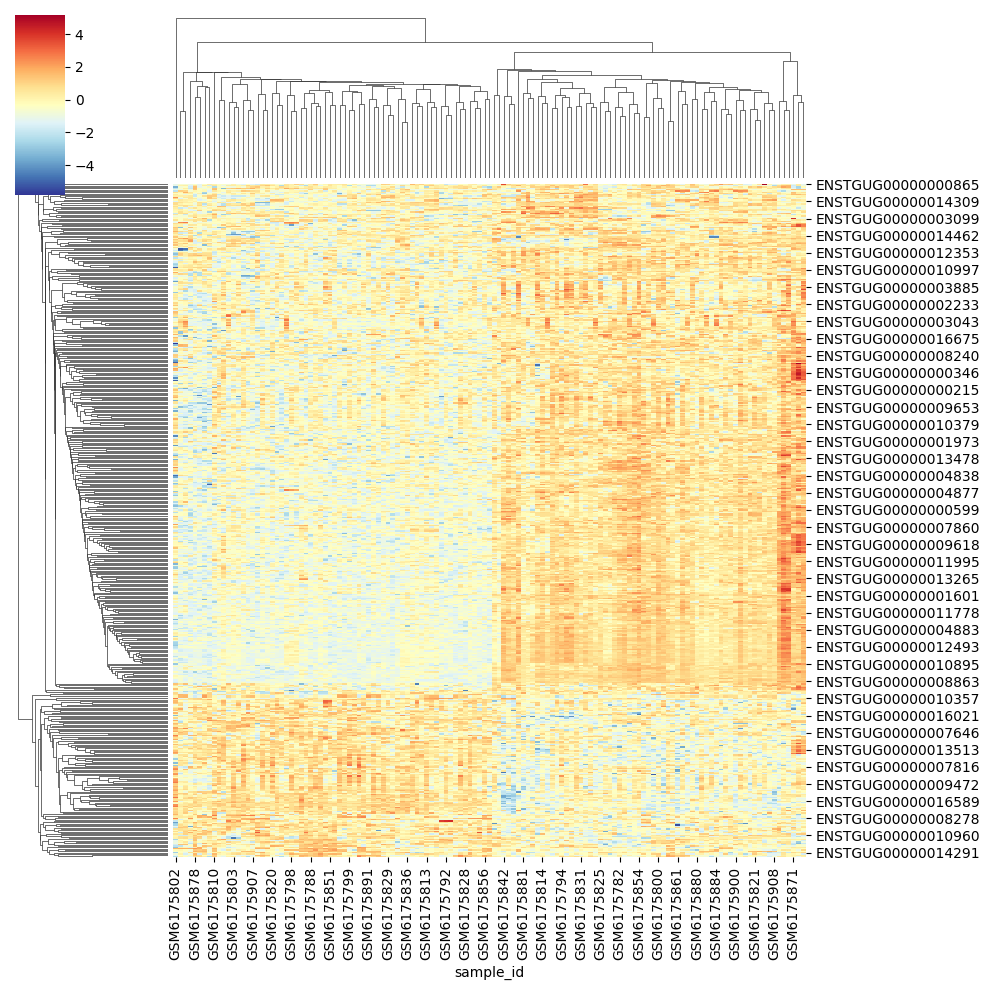

In [35]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')

### volcano plot

In [36]:
#volcano
from sanbomics.plots import volcano

In [37]:
result_sym

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Geneid,,,,,,,
ENSTGUG00000008863,1185.972249,-2.312061,0.070035,-33.013061,5.275807e-239,8.848584e-235,SAAL1
ENSTGUG00000002125,109.475059,-2.806433,0.096124,-29.195947,2.183154e-187,1.830793e-183,OSMR
ENSTGUG00000001849,376.475797,-4.649276,0.169995,-27.349541,1.093553e-164,6.113688e-161,LOC100220412
ENSTGUG00000010839,268.317982,-2.162065,0.082372,-26.247509,7.631292e-152,3.199801e-148,CEBPD
ENSTGUG00000001601,135.203214,-1.911368,0.077197,-24.759686,2.438391e-135,8.179337e-132,LOC105760841
...,...,...,...,...,...,...,...
ENSTGUG00000005270,463.162432,-0.000023,0.059089,-0.000390,9.996890e-01,9.998777e-01,ARID5B
ENSTGUG00000007422,119.092552,0.000022,0.087913,0.000256,9.997961e-01,9.998777e-01,NaN
ENSTGUG00000002518,1128.591001,-0.000025,0.105095,-0.000241,9.998080e-01,9.998777e-01,PCLO


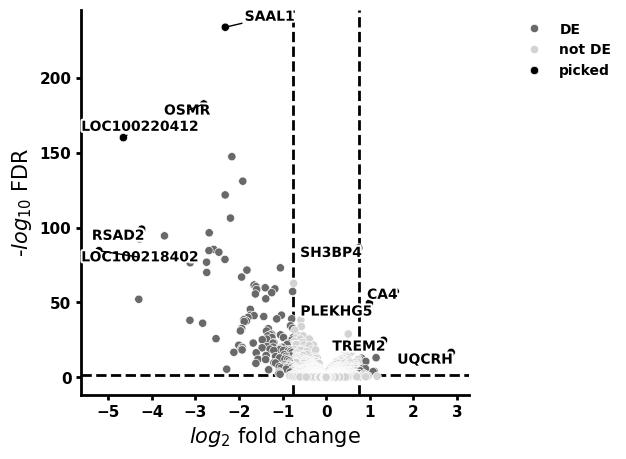

In [38]:
volcano(result_sym, symbol='symbol')

In [39]:
grapher.index

Index(['ENSTGUG00000008863', 'ENSTGUG00000002125', 'ENSTGUG00000001849',
       'ENSTGUG00000010839', 'ENSTGUG00000001601', 'ENSTGUG00000003201',
       'ENSTGUG00000017314', 'ENSTGUG00000006260', 'ENSTGUG00000003925',
       'ENSTGUG00000012992',
       ...
       'ENSTGUG00000009753', 'ENSTGUG00000018629', 'ENSTGUG00000014630',
       'ENSTGUG00000014629', 'ENSTGUG00000014481', 'ENSTGUG00000009949',
       'ENSTGUG00000014655', 'ENSTGUG00000017798', 'ENSTGUG00000018015',
       'ENSTGUG00000008960'],
      dtype='object', length=511)

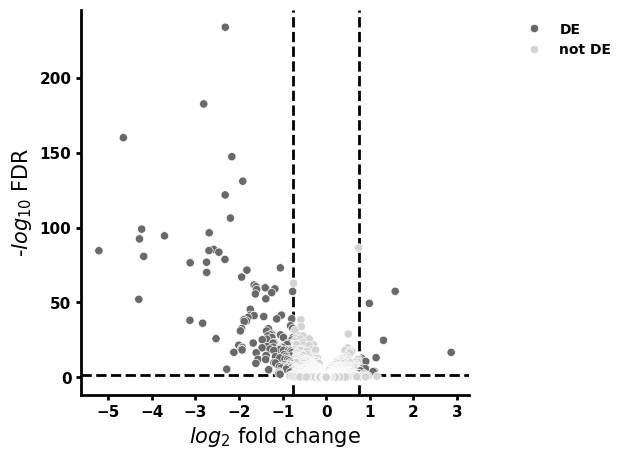

In [40]:
volcano(result_sym, symbol='symbol', to_label = grapher.index)